# Lab 2: Classification and Evaluation metrics
#### COSC 410: Spring 2024, Colgate University

The goal of this notebook is to strengthen your understanding of accuracy, precision and recall. Using Logistic Regression on a toy dataset as a case study, you will practice data exploration, hypothesis generation and implementing the classic ML pipeline. 

Here are some learning objectives for this lab: 
1. Implement accuracy, precision and recall.
2. Learn the sklearn syntax to train and evaluate a classifier. 
3. Generate plots to diagnose why a model might not be performng well, and generate hypotheses about how to improve the model. 
4. Read documentation to list and understand the hyperparameters of models. 

There are 8 parts to this lab. The table below highlights what you are expected to do in each part. 

| Part | Description                                   | Write code? | Write responses? | 
|------|-----------------------------------------------| ------------|------------------|
| 1    | Familiarizing yourself with the data          | Yes         | No               |
| 2    | Fitting a logistic regression model           | No          | Yes              |
| 3    | Implementing evaluation metrics               | Yes         | No               |
| 4    | Evaluating the model                          | Yes         | Yes              |
| 5    | Generating hypotheses about feature importance| Yes         | Yes              |
| 6    | Testing hypotheses about feature importance   | Yes         | Yes              |
| 7    | Hyperparameter tuning                         | Yes         | Yes              |
| 8    | Final model evaluation                        | Yes         | No               |



## Part 1: Familiarizing yourself with the data

### Load in data

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('dat.csv')

### Describe the data

1. How many rows does it have?
2. What are the different labels?
3. What are the other columns in the data that we might be able to use to predict the labels?

In [3]:
## WRITE CODE HERE TO ANSWER THE QUESTIONS
print(df.shape)
print("1000 rows")
print(df['label'].unique())
print("The unique labels are Cat and Cookie")
print("FeatureA, featureB, featureC, could be used to predict the labels")




(1000, 5)
1000 rows
['Cat' 'Cookie']
The unique labels are Cat and Cookie
FeatureA, featureB, featureC, could be used to predict the labels


### Split the data into train, validation and test

In [4]:
n = df.shape[0]

train = df.iloc[0:int(n*0.8)]
val = df.iloc[int(n*0.8):int(n*0.9)]
test = df.iloc[int(n*0.9):n]

print(f'Train has {train.shape[0]} rows')
print(f'Val has {val.shape[0]} rows')
print(f'Test has {test.shape[0]} rows')

Train has 800 rows
Val has 100 rows
Test has 100 rows


## Part 2: Fitting a logistic regression model

Let us start by trying to predict the label based on just one of the columns: featureA. We can use the `LogisticRegression` function from sklearn. 

In [5]:
## Create separate dataframes for input (X) and output (y) from train

X_train = train[['featureA']]  # you can add more columns here.
y_train = train['label']

# Initialize the model
model = LogisticRegression() # with default parameters

# Fit the model
model.fit(X_train, y_train)  # note this modifies the model object, doesn't return

LogisticRegression()

In [6]:
## Create separate dataframes for input (X) and output (y) from validation
X_val = val[['featureA']]
y_val = val['label']

## Use model to predict labels using X_val
y_pred = model.predict(X_val)

### Why are we evaluating the model on the validation set and not the test set? 


In this case, we use a validation set since it is used to compare models which makes it possible, to select the best model and tune the hyperparameter whereas a test set is used to estimate the generalization error that a model will make on new instances before the model is launched in production

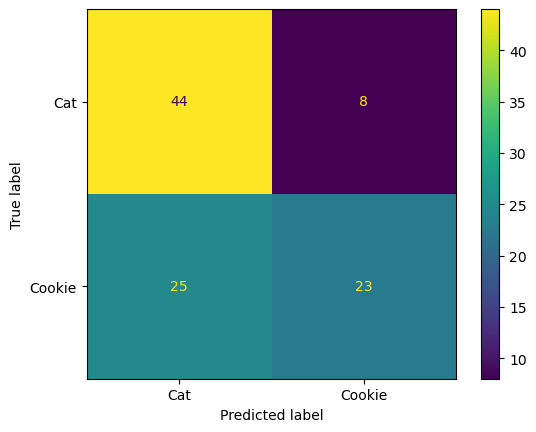

In [7]:
## Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

### Is this a good classifier? 

On reviewing the confusion matrix, it looks like the classifier isn't very strong due to the high number of false negatives. This suggests that many cookies are being mistakenly classified as cats which could be a problem, especially if the cost of not correctly identifying cookies is significant.

## Part 3: Implementing evaluation metrics

In [8]:
def accuracy(pred, true):
    """
    Input:
        pred: numpy array of predicted labels
        true: numpy array of true labels
    Output:
        accuracy: float as percent; rounded to two decimal points
    """

    # WRITE CODE HERE
    # print(pred)
    
    correct = 0
    for i in range(len(pred)):
        if pred[i] == true[i]:
            correct += 1

    total = len(pred)
    return (correct/total)*100
    
    


x = np.array([1,1,1,1,1,0])
y = np.array([0,0,1,1,1,1])

print(accuracy(x,y)) #50.0

x = np.array(['A','A','B','A', 'A', 'A', 'A'])
y = np.array(['A','B','A','B', 'B', 'B', 'B'])


result = accuracy(x, y)
rounded_result = round(result, 2)
print(rounded_result)


50.0
14.29


In [9]:
def precision(pred, true):
    """
    Input:
        pred: numpy array of predicted labels
        true: numpy array of true labels
    Output:
        macro average precision: float as percent; rounded to two decimal points
    """
    # print(np.unique(pred))
    TP = 0
    FN = 0
    FP = 0
    
    Val1 = np.unique(pred)[0]
    Val2 = np.unique(pred)[1]
 
    
    for i in range(len(pred)):
        if pred[i] == Val1 and true[i] == Val1:
            TP += 1
        if pred[i] == Val1 and true[i] == Val2:
            FP += 1
        if pred[i] == Val2 and true[i] == Val1:
            FN += 1

    precision1 = TP/(TP+FP)

    TP = 0
    FN = 0
    FP = 0

    for i in range(len(pred)):
        if pred[i] == Val2 and true[i] == Val2:
            TP += 1
        if pred[i] == Val2 and true[i] == Val1:
            FP += 1
        if pred[i] == Val1 and true[i] == Val2:
            FN += 1
    
    precision2 = TP/(TP+FP)

    return ((precision1 + precision2 )/2) *100
    
    
        
x = np.array([1,1,1,1,1,0])
y = np.array([0,0,1,1,1,1])

print(precision(x,y)) #30.0

x = np.array(['A','A','B','A', 'A', 'A', 'A'])
y = np.array(['A','A','A','A', 'A', 'A', 'B'])

result = precision(x, y)
rounded_result = round(result, 2)
print(rounded_result)
 #41.67   

30.0
41.67


In [10]:
def recall(pred, true):
    """
    Input:
        pred: numpy array of predicted labels
        true: numpy array of true labels
    Output:
        macro average precision: float as percent; rounded to two decimal points
    """
    # print(np.unique(pred))
    TP = 0
    FN = 0
    FP = 0
    
    Val1 = np.unique(pred)[0]
    Val2 = np.unique(pred)[1]
 
    
    for i in range(len(pred)):
        if pred[i] == Val1 and true[i] == Val1:
            TP += 1
        if pred[i] == Val1 and true[i] == Val2:
            FP += 1
        if pred[i] == Val2 and true[i] == Val1:
            FN += 1

    recall1 = TP/(TP+FN)

    TP = 0
    FN = 0
    FP = 0

    for i in range(len(pred)):
        if pred[i] == Val2 and true[i] == Val2:
            TP += 1
        if pred[i] == Val2 and true[i] == Val1:
            FP += 1
        if pred[i] == Val1 and true[i] == Val2:
            FN += 1
    
    recall2 = TP/(TP+FN)

    return ((recall1 + recall2 )/2) *100

x = np.array([1,1,1,1,1,0])
y = np.array([0,0,1,1,1,1])

print(recall(x,y)) #37.5

x = np.array(['A','A','B','A', 'A', 'A', 'A'])
y = np.array(['A','A','A','A', 'A', 'A', 'B'])



result = recall(x, y)
rounded_result = round(result, 2)
print(rounded_result)
#41.67   

37.5
41.67


## Part 4: Evaluating the model 
Compute the accuracy, precision and recall for the model we fit earlier

In [11]:
# WRITE CODE HERE

y_val = y_val.to_numpy()

# y_pred = np.array(y_pred)

accuracy_score = accuracy(y_pred, y_val)
rounded_res = round(accuracy_score,2)
print(rounded_res)


# Accuracy: 64.0

precision_score = precision(y_pred, y_val)
rounded_res = round(precision_score,2)
print(rounded_res)
# Precision: 64.04

recall_score = recall(y_pred, y_val)
rounded_res = round(recall_score,2)
print(rounded_res)
# Recall: 63.91



67.0
68.98
66.27


### Interpreting the numbers
Do these numbers capture all of the insights you got from the confusion matrix earlier? If not, why?

Since these numbers are a macro average it tells us overall how the model is at precision and recall. The numbers do not give us specifics for how well the model does in Cat vs Cookie like the confusion matrix did. For example, in the confusion matrix it is easier to see that Cat has a high recall(84.6) and Cookie has a high precision (74.2).

## Part 5: Generating hypotheses about what features are important 

To generate hypotheses about whether specific features are important, it can be helpful to visualize the distribution of the categories in an n-d space (where n is the number of features), and then look at the degree of overlap between the categories in this space. 

### What should the plots look like?
Brainstorm what kinds of plots might be helpful to visualize the distribution of categories in a 1-d space and 2-d space. (It might helpful to actually draw these plots out on paper)


Boxplots, histograms, or comparing the features against each other are all good ways to visualize the distribution of categories. If we see signs of separation between the data then we know the feature(s) are worth using.

### Explore the importance of each individual feature

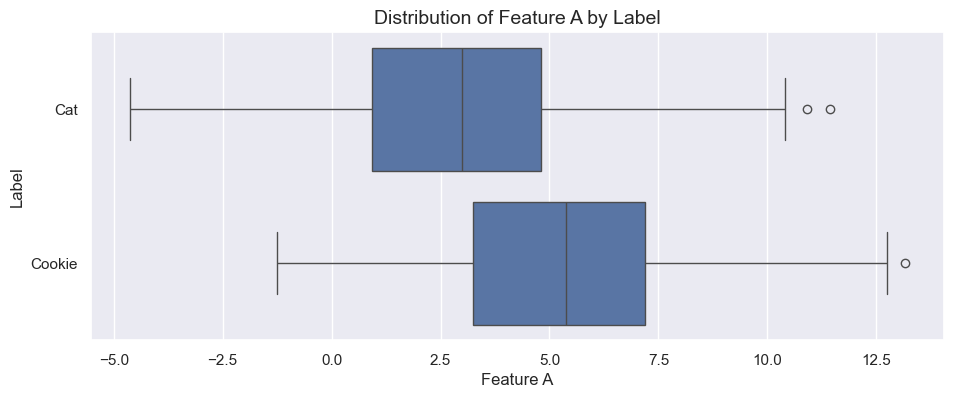

In [12]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(rc={'figure.figsize':(11, 4)})
sns.boxplot(data=df, x='featureA', y='label')
plt.xlabel("Feature A")
plt.ylabel("Label")
plt.title('Distribution of Feature A by Label', fontsize=14)
plt.show()


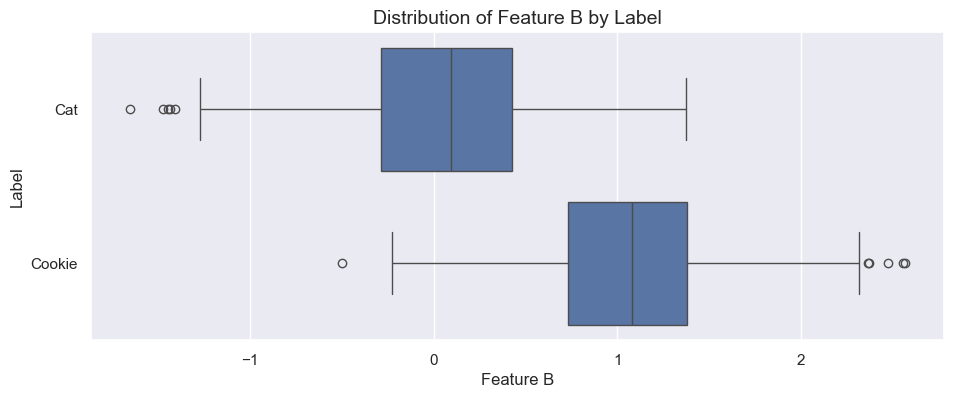

In [13]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(rc={'figure.figsize':(11, 4)})
sns.boxplot(data=df, x='featureB', y='label')
plt.xlabel("Feature B")
plt.ylabel("Label")
plt.title('Distribution of Feature B by Label', fontsize=14)
plt.show()

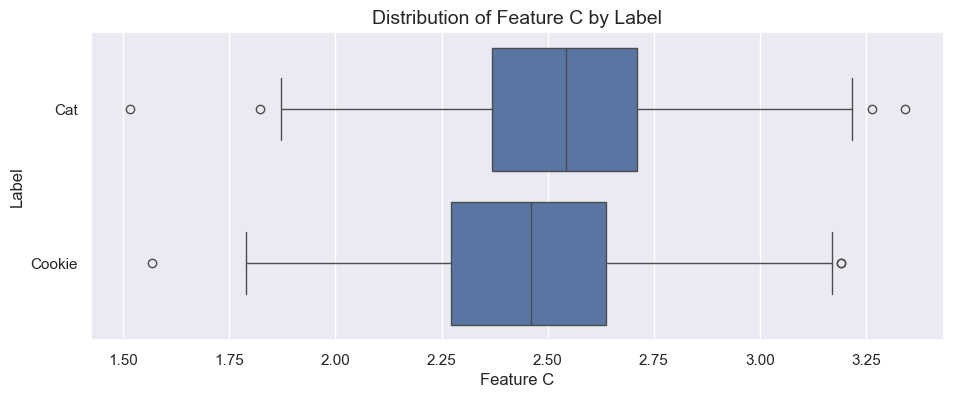

In [14]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(rc={'figure.figsize':(11, 4)})
sns.boxplot(data=df, x='featureC', y='label')
plt.xlabel("Feature C")
plt.ylabel("Label")
plt.title('Distribution of Feature C by Label', fontsize=14)
plt.show()

### Explore the importance of all combinations of two features

Text(0.5, 1.0, 'Feature A Vs Feature A ')

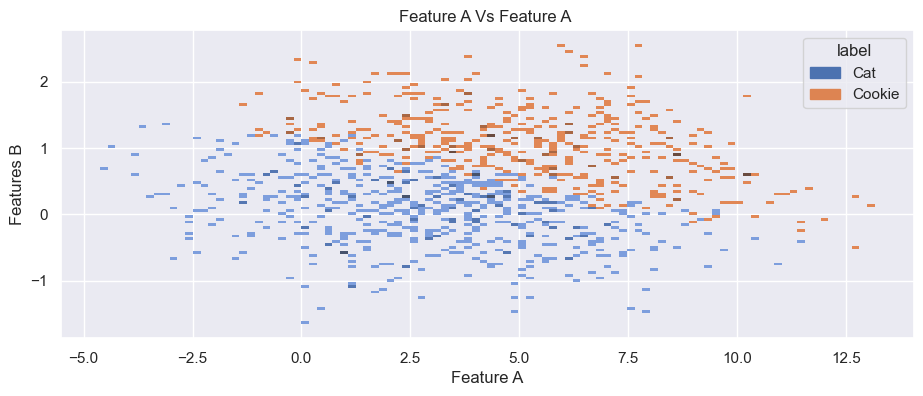

In [15]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
plot = sns.histplot(data=df, x="featureA", y="featureB", hue="label", bins= 100)
plot.set_xlabel("Feature A")
plot.set_ylabel("Features B")
plot.set_title("Feature A Vs Feature A ")




Text(0.5, 1.0, 'Feature B Vs Feature C ')

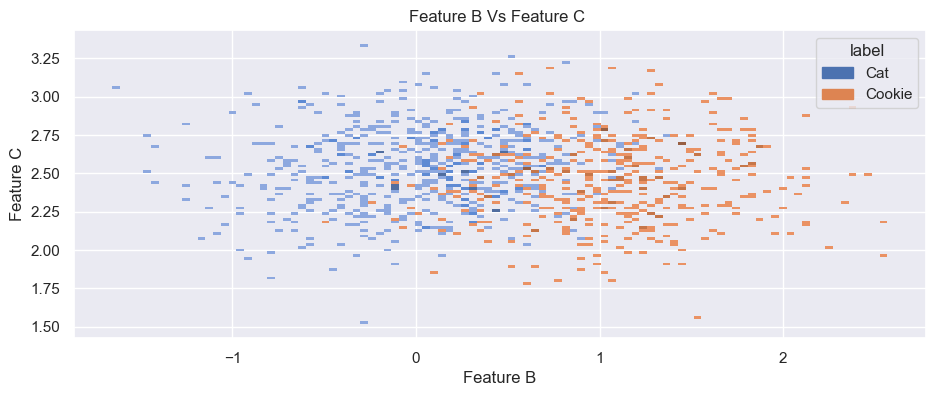

In [16]:
plot = sns.histplot(data=df, x="featureB", y="featureC", hue="label", bins= 100)
plot.set_xlabel("Feature B")
plot.set_ylabel("Feature C")
plot.set_title("Feature B Vs Feature C ")




Text(0.5, 1.0, 'Feature A Vs Feature C ')

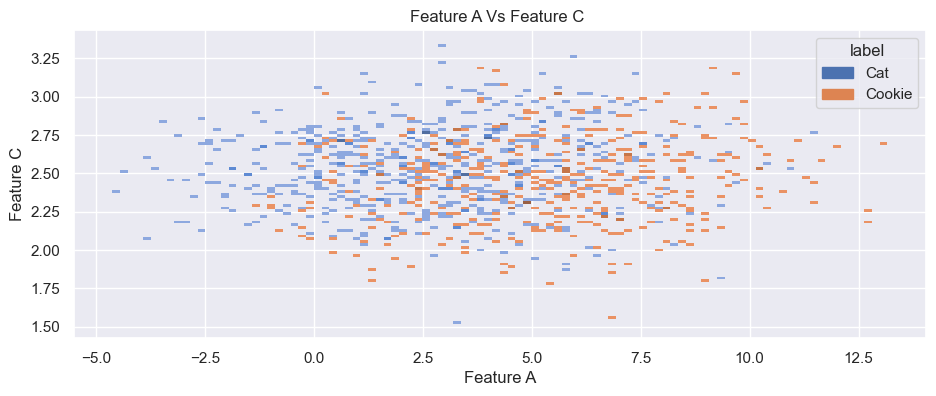

In [17]:
plot = sns.histplot(data=df, x="featureA", y="featureC", hue="label", bins= 100)
plot.set_xlabel("Feature A")
plot.set_ylabel("Feature C")
plot.set_title("Feature A Vs Feature C ")



### Synthesize your hypotheses

1. Why did the original model we fit perform poorly?
2. If you could pick just one feature, which would you pick? Why?
3. If you could pick just two features, which would you pick? Why?

1) The original model we fit performed poorly because it was only basing the model on Feature A. Using a combination of features or a better feature would result in a better model.
2) If we could pick just one feature it would be feature B. From the individual box plot of B we can see a clear difference in the data that leads to a Cat prediction versus a Cookie prediction. This is what we want from our model.
3) If we could pick two features they would be A and B. From the feature A vs feature B plot we can easily draw a line between the Cat data and the Cookie data. This means it will work well for a model.

## Part 6: Testing your hypotheses

Fit models for all individual features, and combinations of features

Train has 800 rows
Val has 100 rows
Test has 100 rows


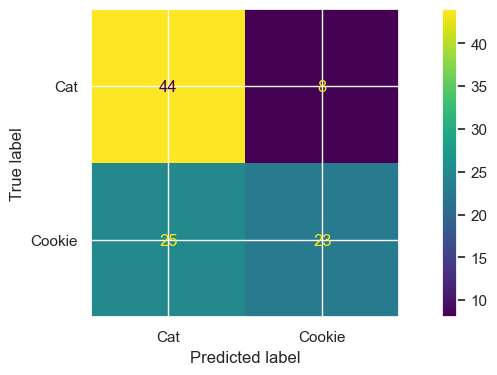

Accuracy Score: 67.0 
Recall Score: 66.27 
Precision Score: 68.98 


In [18]:
n = df.shape[0]

train = df.iloc[0:int(n*0.8)]
val = df.iloc[int(n*0.8):int(n*0.9)]
test = df.iloc[int(n*0.9):n]

print(f'Train has {train.shape[0]} rows')
print(f'Val has {val.shape[0]} rows')
print(f'Test has {test.shape[0]} rows')

## Create separate dataframes for input (X) and output (y) from train

X_train = train[['featureA']]  # you can add more columns here.
y_train = train['label']

# Initialize the model
model = LogisticRegression() # with default parameters

# Fit the model
model.fit(X_train, y_train)  # note this modifies the model object, doesn't return


## Create separate dataframes for input (X) and output (y) from validation
X_val = val[['featureA']]
y_val = val['label']

## Use model to predict labels using X_val
y_pred = model.predict(X_val)

## Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()



y_val1 = y_val.to_numpy()
# y_pred = np.array(y_pred)

accuracy_score = accuracy(y_pred, y_val1)
rounded_res = round(accuracy_score,2)
print(f"Accuracy Score: {rounded_res} " )

recall_score = recall(y_pred, y_val1)
rounded_res1 = round(recall_score,2)
print(f"Recall Score: {rounded_res1} " )

precision_score = precision(y_pred, y_val1)
rounded_res2 = round(precision_score,2)
print(f"Precision Score: {rounded_res2} " )



Train has 800 rows
Val has 100 rows
Test has 100 rows


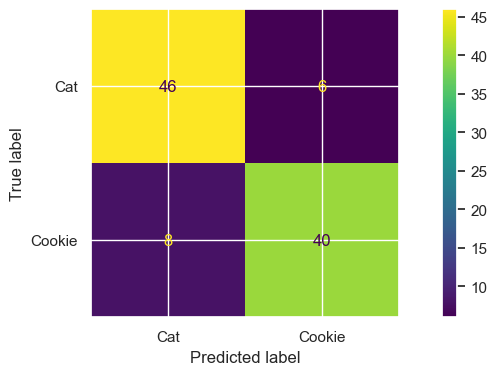

Accuracy Score: 86.0 
Recall Score: 85.9 
Precision Score: 86.07 


In [19]:
n = df.shape[0]

train = df.iloc[0:int(n*0.8)]
val = df.iloc[int(n*0.8):int(n*0.9)]
test = df.iloc[int(n*0.9):n]

print(f'Train has {train.shape[0]} rows')
print(f'Val has {val.shape[0]} rows')
print(f'Test has {test.shape[0]} rows')

## Create separate dataframes for input (X) and output (y) from train

X_train = train[['featureB']]  # you can add more columns here.
y_train = train['label']

# Initialize the model
model = LogisticRegression() # with default parameters

# Fit the model
model.fit(X_train, y_train)  # note this modifies the model object, doesn't return


## Create separate dataframes for input (X) and output (y) from validation
X_val = val[['featureB']]
y_val = val['label']

## Use model to predict labels using X_val
y_pred = model.predict(X_val)

## Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()



y_val1 = y_val.to_numpy()
# y_pred = np.array(y_pred)

accuracy_score = accuracy(y_pred, y_val1)
rounded_res = round(accuracy_score,2)
print(f"Accuracy Score: {rounded_res} " )

recall_score = recall(y_pred, y_val1)
rounded_res1 = round(recall_score,2)
print(f"Recall Score: {rounded_res1} " )

precision_score = precision(y_pred, y_val1)
rounded_res2 = round(precision_score,2)
print(f"Precision Score: {rounded_res2} " )


Train has 800 rows
Val has 100 rows
Test has 100 rows


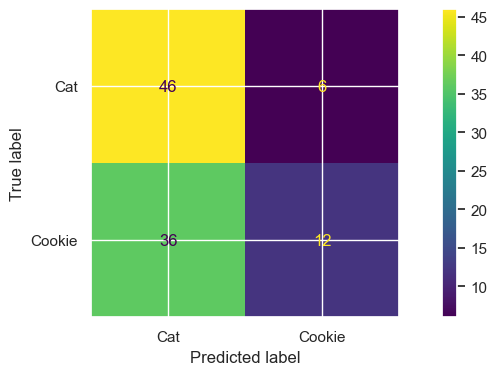

Accuracy Score: 58.0 
Recall Score: 56.73 
Precision Score: 61.38 


In [20]:
n = df.shape[0]

train = df.iloc[0:int(n*0.8)]
val = df.iloc[int(n*0.8):int(n*0.9)]
test = df.iloc[int(n*0.9):n]

print(f'Train has {train.shape[0]} rows')
print(f'Val has {val.shape[0]} rows')
print(f'Test has {test.shape[0]} rows')

## Create separate dataframes for input (X) and output (y) from train

X_train = train[['featureC']]  # you can add more columns here.
y_train = train['label']

# Initialize the model
model = LogisticRegression() # with default parameters

# Fit the model
model.fit(X_train, y_train)  # note this modifies the model object, doesn't return


## Create separate dataframes for input (X) and output (y) from validation
X_val = val[['featureC']]
y_val = val['label']

## Use model to predict labels using X_val
y_pred = model.predict(X_val)

## Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()



y_val1 = y_val.to_numpy()
# y_pred = np.array(y_pred)

accuracy_score = accuracy(y_pred, y_val1)
rounded_res = round(accuracy_score,2)
print(f"Accuracy Score: {rounded_res} " )

recall_score = recall(y_pred, y_val1)
rounded_res1 = round(recall_score,2)
print(f"Recall Score: {rounded_res1} " )

precision_score = precision(y_pred, y_val1)
rounded_res2 = round(precision_score,2)
print(f"Precision Score: {rounded_res2} " )


Train has 800 rows
Val has 100 rows
Test has 100 rows


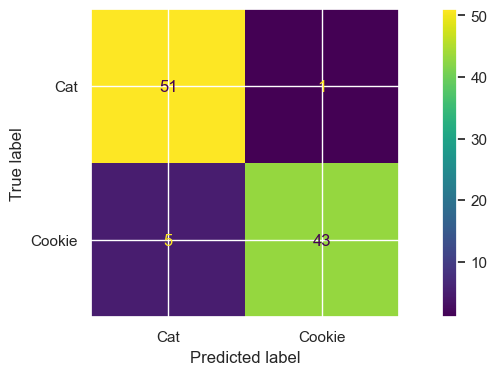

Accuracy Score: 94.0 
Recall Score: 93.83 
Precision Score: 94.4 


In [21]:
n = df.shape[0]

train = df.iloc[0:int(n*0.8)]
val = df.iloc[int(n*0.8):int(n*0.9)]
test = df.iloc[int(n*0.9):n]

print(f'Train has {train.shape[0]} rows')
print(f'Val has {val.shape[0]} rows')
print(f'Test has {test.shape[0]} rows')

## Create separate dataframes for input (X) and output (y) from train

X_train = train[['featureA','featureB']] # you can add more columns here.
y_train = train['label']

# Initialize the model
model = LogisticRegression() # with default parameters

# Fit the model
model.fit(X_train, y_train)  # note this modifies the model object, doesn't return


## Create separate dataframes for input (X) and output (y) from validation
X_val = val[['featureA','featureB']]
y_val = val['label']

## Use model to predict labels using X_val
y_pred = model.predict(X_val)

## Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()



y_val1 = y_val.to_numpy()
# y_pred = np.array(y_pred)

accuracy_score = accuracy(y_pred, y_val1)
rounded_res = round(accuracy_score,2)
print(f"Accuracy Score: {rounded_res} " )

recall_score = recall(y_pred, y_val1)
rounded_res1 = round(recall_score,2)
print(f"Recall Score: {rounded_res1} " )

precision_score = precision(y_pred, y_val1)
rounded_res2 = round(precision_score,2)
print(f"Precision Score: {rounded_res2} " )


Train has 800 rows
Val has 100 rows
Test has 100 rows


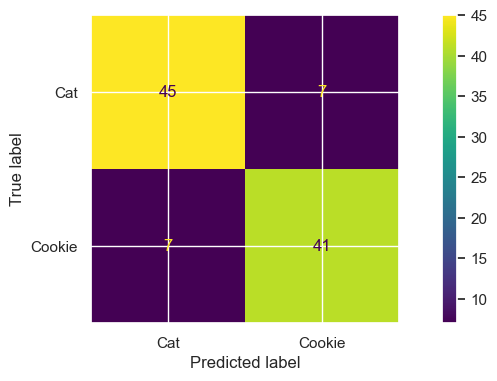

Accuracy Score: 86.0 
Recall Score: 85.98 
Precision Score: 85.98 


In [22]:
# WRITE CODE HERE FOR FEATURE B,C

n = df.shape[0]

train = df.iloc[0:int(n*0.8)]
val = df.iloc[int(n*0.8):int(n*0.9)]
test = df.iloc[int(n*0.9):n]

print(f'Train has {train.shape[0]} rows')
print(f'Val has {val.shape[0]} rows')
print(f'Test has {test.shape[0]} rows')

## Create separate dataframes for input (X) and output (y) from train

X_train = train[['featureB','featureC']] # you can add more columns here.
y_train = train['label']

# Initialize the model
model = LogisticRegression() # with default parameters

# Fit the model
model.fit(X_train, y_train)  # note this modifies the model object, doesn't return


## Create separate dataframes for input (X) and output (y) from validation
X_val = val[['featureB','featureC']]
y_val = val['label']

## Use model to predict labels using X_val
y_pred = model.predict(X_val)

## Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()



y_val1 = y_val.to_numpy()
# y_pred = np.array(y_pred)

accuracy_score = accuracy(y_pred, y_val1)
rounded_res = round(accuracy_score,2)
print(f"Accuracy Score: {rounded_res} " )

recall_score = recall(y_pred, y_val1)
rounded_res1 = round(recall_score,2)
print(f"Recall Score: {rounded_res1} " )

precision_score = precision(y_pred, y_val1)
rounded_res2 = round(precision_score,2)
print(f"Precision Score: {rounded_res2} " )

Train has 800 rows
Val has 100 rows
Test has 100 rows


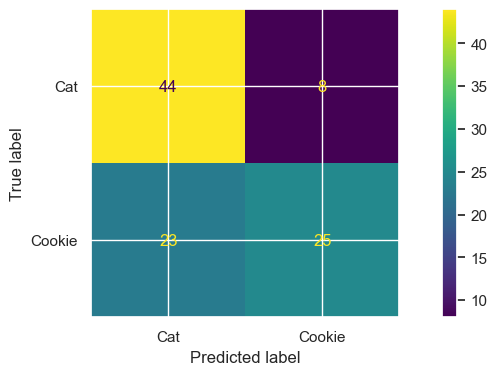

Accuracy Score: 69.0 
Recall Score: 68.35 
Precision Score: 70.71 


In [23]:
# WRITE CODE HERE FOR FEATURE A,C

n = df.shape[0]

train = df.iloc[0:int(n*0.8)]
val = df.iloc[int(n*0.8):int(n*0.9)]
test = df.iloc[int(n*0.9):n]

print(f'Train has {train.shape[0]} rows')
print(f'Val has {val.shape[0]} rows')
print(f'Test has {test.shape[0]} rows')

## Create separate dataframes for input (X) and output (y) from train

X_train = train[['featureA','featureC']] # you can add more columns here.
y_train = train['label']

# Initialize the model
model = LogisticRegression() # with default parameters

# Fit the model
model.fit(X_train, y_train)  # note this modifies the model object, doesn't return


## Create separate dataframes for input (X) and output (y) from validation
X_val = val[['featureA','featureC']]
y_val = val['label']

## Use model to predict labels using X_val
y_pred = model.predict(X_val)

## Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()



y_val1 = y_val.to_numpy()
# y_pred = np.array(y_pred)

accuracy_score = accuracy(y_pred, y_val1)
rounded_res = round(accuracy_score,2)
print(f"Accuracy Score: {rounded_res} " )

recall_score = recall(y_pred, y_val1)
rounded_res1 = round(recall_score,2)
print(f"Recall Score: {rounded_res1} " )

precision_score = precision(y_pred, y_val1)
rounded_res2 = round(precision_score,2)
print(f"Precision Score: {rounded_res2} " )

### Do the results match your hypotheses?



These results do match our hypotheses. When only using one feature, B has the best accuracy score of 86% in comparison to 67% for A and 58% for C. When using two features, features A and B were also the most accurate at 94% accuracy in comparison to 69% for A&C and 86% for B&C.

## Part 7: Hyperparameter tuning

The `LogisticRegression` function has several hyperparameters. Read about these hyperparameters in the documentation for this function. 


### Generating hypotheses about relevance of hyperparameters

Which of the hyperparameters (if any) do you think is likely to influence the results and why?



**[WRITE YOUR ANSWER HERE]**

### Testing hypotheses about relevance of hyperparameters

For the hyperparameters you selected in the previous answer, experiment with the different settings, and see if they improve your results or make them worse. Feel free to add as many code chunks as you need. s

Accuracy with C=10: 99.0
Recall Score: 99.04 
Precision Score: 98.98 


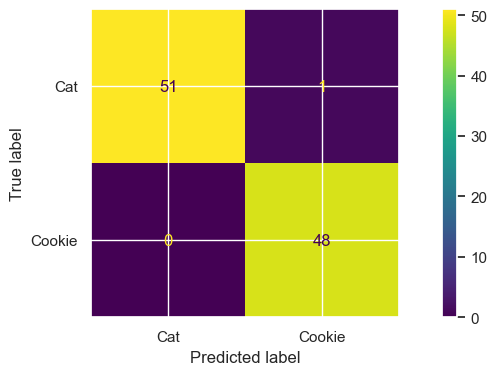

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


X_train = train[['featureA','featureB', 'featureC']]
y_train = train['label']


model = LogisticRegression(C=10)  # Set C to a value 10

# Fit the model on the training data
model.fit(X_train, y_train)


X_val = val[['featureA','featureB', 'featureC']]
y_val = val['label']


y_pred = model.predict(X_val)


accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy with C=10: {accuracy*100}")

y_val1 = y_val.to_numpy()
# y_pred = np.array(y_pred)



recall_score = recall(y_pred, y_val1)
rounded_res1 = round(recall_score,2)
print(f"Recall Score: {rounded_res1} " )

precision_score = precision(y_pred, y_val1)
rounded_res2 = round(precision_score,2)
print(f"Precision Score: {rounded_res2} " )


# Plot the confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()



## Part 8: Fit the final model and evaluate it

Based on your experimentation, select the best model and report the final results. (Think about which dataset you want to evaluate your final model on)

Accuracy with C=10: 99.0
Recall Score: 100.0 
Precision Score: 100.0 


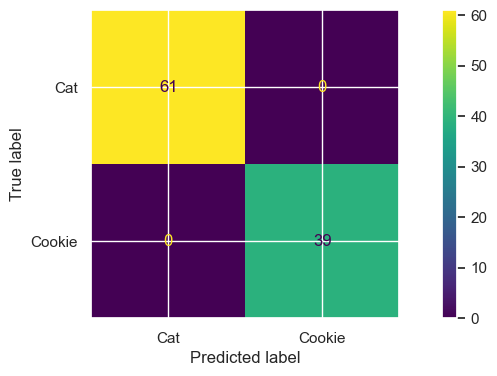

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X_train = train[['featureA','featureB', 'featureC']]
y_train = train['label']

# Initialize and fit the model with the best hyperparameter
model = LogisticRegression(C=10)  # Using C=10 based on previous tuning
model.fit(X_train, y_train)

# Prepare the test data (not validation data)
X_test = test[['featureA','featureB', 'featureC']]
y_test = test['label']
y_test = y_test.to_numpy()

# Predict on the test data using the fitted model
y_pred_test = model.predict(X_test)

# Evaluate the model on the test data
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy with C=10: {accuracy*100}")

recall_test = recall(y_test, y_pred_test) 
rounded_res1 = round(recall_test,2)
print(f"Recall Score: {rounded_res1} " )

precision_test = precision(y_test, y_pred_test)
rounded_res2 = round(precision_test,2)
print(f"Precision Score: {rounded_res2} " )



# Plot the confusion matrix for the test data
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
disp.plot()
plt.show()
